># **Intrusion Detection System Using Machine Learning with Feature Engineering and PCA for Network Security** 
 ---------------------------------------------------------------------------------------------------------------


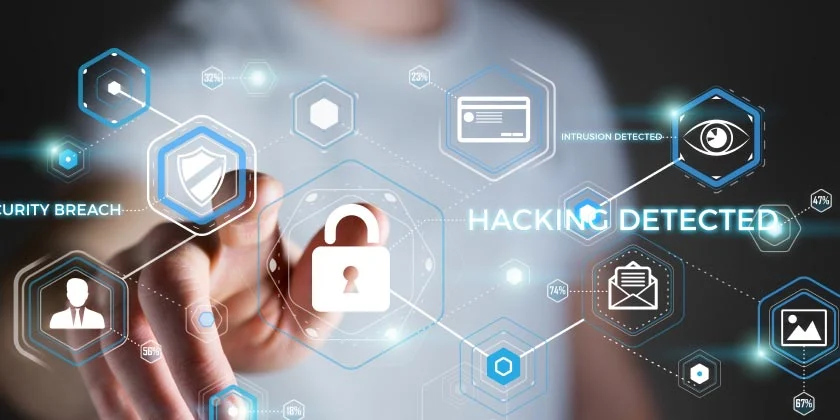

**Name:KRISHNAKRIPA VM**

**Organization:Entri Elevate**

**Date:25-09-2024**


## 1.Overview of Problem Statement:
>>>`Cybersecurity is a crucial aspect in today’s digital landscape, where preventing and identifying attacks is of paramount importance. The given dataset contains information about network traffic, and the goal is to build a machine learning model to predict whether a given traffic event is an attack or normal behavior based on its features.`

## 2.Objective:
>>>`To develop a predictive model using machine learning algorithms to classify network traffic events as either normal or malicious (attack).`

## 3.Data Description:

>>>⚫`Source: UNSW Cybersecurity dataset : https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/`

>>>⚫`Datast: https://data.world/victorpuli/useful-unsw-nb15-data`

>>>⚫`Features:`

>>>>>▶ **id** ----------Unique identifier for each record               
>>>>>▶ **dur** --------------Duration of the flow.              
>>>>>▶ **spkts** ------------Source packets in the flow.               
>>>>>▶ **dpkts** -------------Destination packets in the flow.          
>>>>>▶ **sbytes** -------------Source bytes in the flow.             
>>>>>▶ **dbytes** ---------------Destination bytes in the flow.              
>>>>>▶ **rate**  ----------------Transmission rate in bytes per second.            
>>>>>▶ **sttl**  -----------------Source-to-destination time-to-live.             
>>>>>▶ **dttl**  ----------------Destination-to-source time-to-live              
>>>>>▶ **sload** ----------------  Source bits per second.

           
>>>>>▶ **dload**  ------------- Destination bits per second.           
>>>>>▶ **sloss**  ------------- Source packet loss.           
>>>>>▶ **dloss**  ------------- Destination packet loss          
>>>>>▶ **sinpkt** ------------- Source inter-packet arrival time.        
>>>>>▶ **dinpkt** ------------- Destination inter-packet arrival time.           
>>>>>▶ **sjit**  -------------- Source jitter (variation in packet delay).            
>>>>>▶ **djit**  -------------- Destination jitter.            
>>>>>▶ **swin**  -------------- Source TCP window advertisement.              
>>>>>▶ **stcpb** -------------- Source TCP base sequence number.              
>>>>>▶ **dtcpb** -------------- Destination TCP base sequence number.             
>>>>>▶ **dwin**  -------------- Destination TCP window advertisement.               
>>>>>▶ **ackdat** --------------- Acknowledgment data.            
>>>>>▶ **smean**  --------------- Mean of the flow’s packet size from the source.

            
>>>>>▶ **dmean** --------------- Mean of the flow’s packet size from the destination.

           
>>>>>▶ **trans_depth**------------- HTTP transaction depth.

       
>>>>>▶ **response_body_len** ------------ Content size of the HTTP response.



>>>>>▶ **ct_srv_src** ---------------- Number of connections from the same source.       
>>>>>▶ **ct_state_ttl** --------------- Number of connections with the same state and time-to-live.     

>>>>>▶ **ct_dst_ltm** ----------------- Number of connections to the same destination.     
 ▶ **ct_src_dport_ltm** --------------- Number of connections from the same source IP and port.  
 ▶ **ct_dst_sport_ltm** --------------- Number of connections to the same destination IP and port.

>>>>>▶ **ct_dst_src_ltm** ----------------  Number of connections between same source-destination IP pairs.    
▶ **is_ftp_login** ----------------- Whether the FTP session is accessed by user & password.    
▶ **t_ftp_cmd**  ------------------- Number of commands in FTP session.      
▶ **ct_flw_http_mthd** -------------- Number of flows using HTTP methods.  
▶ **ct_src_ltm**   -------------- Number of connections from the same source IP.    
▶ **ct_srv_dst**  -------------- Number of connections to the same service.

      
>>>>>▶ **is_sm_ips_ports**  -------------- If source and destination IP ports are equal.       
▶ **label**   -------------- The target variable indicating whether the flow is normal or malicious.          

## 4.Data Collection:
>>>`Data has been provided and imported. Next, we gained insights into the data distribution and patterns through initial checks and will continue with further analysis.`

#### ↦ **IMPORTING LIBRARIES**
**-----------------------------------**

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
# Sklearn modules for preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


#### ↦ **LOADING DATASET**
**---------------------------------**

In [2]:
file_path = os.path.join(r"C:\Users\DELL\Downloads\PROJECT CAPSTONE", "unsw-nb15-dataMODIFIED.csv")
df = pd.read_csv(file_path)

#### ↦ **Gain insights into the data distribution, relationships, and potential patterns**.
  **---------------------------------------------------------------------------------------------------------------------**

In [3]:
print("Data Summary:")
df.info()

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192111 entries, 0 to 192110
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 192111 non-null  int64  
 1   dur                192111 non-null  float64
 2   spkts              192111 non-null  int64  
 3   dpkts              192111 non-null  int64  
 4   sbytes             192111 non-null  int64  
 5   dbytes             192111 non-null  int64  
 6   rate               192111 non-null  float64
 7   sttl               192111 non-null  int64  
 8   dttl               192111 non-null  int64  
 9   sloss              192111 non-null  int64  
 10  dloss              192111 non-null  int64  
 11  sinpkt             192111 non-null  float64
 12  dinpkt             192111 non-null  float64
 13  sjit               192111 non-null  float64
 14  djit               192111 non-null  float64
 15  swin               192111 non-null  i

#### 1. General Overview
##### -The dataset contains 192,111 rows and 39 columns.
##### -All columns have non-null values, meaning no missing data exists in this dataset.
#### 2.Data types:
##### -30 integer columns (int64) mostly represent count-like values, categories, or labels.
##### -9 float columns (float64) appear to represent continuous or computed metrics.

In [4]:
print(f"first few rows of the dataset::\n")
df.head(10)

first few rows of the dataset::



,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sloss,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000011,2,0,496,0,90909.09020,254,0,0,...,1,1,2,0,0,0,1,2,0,0
1,2,0.000008,2,0,1762,0,125000.00030,254,0,0,...,1,1,2,0,0,0,1,2,0,0
2,3,0.000005,2,0,1068,0,200000.00510,254,0,0,...,1,1,3,0,0,0,1,3,0,0
3,4,0.000006,2,0,900,0,166666.66080,254,0,0,...,2,1,3,0,0,0,2,3,0,0
4,5,0.000010,2,0,2126,0,100000.00250,254,0,0,...,2,1,3,0,0,0,2,3,0,0
5,6,0.000003,2,0,784,0,333333.32150,254,0,0,...,2,1,2,0,0,0,2,2,0,0
6,7,0.000006,2,0,1960,0,166666.66080,254,0,0,...,2,1,2,0,0,0,2,2,0,0
7,8,0.000028,2,0,1384,0,35714.28522,254,0,0,...,1,1,3,0,0,0,1,3,0,0
8,9,0.000000,1,0,46,0,0.00000,0,0,0,...,2,2,2,0,0,0,2,2,1,0
9,10,0.000000,1,0,46,0,0.00000,0,0,0,...,2,2,2,0,0,0,2,2,1,0


1. Features Analysis
Traffic Characteristics (e.g., dur, spkts, dpkts, sbytes, dbytes):

>dur (duration) values are very small, indicating short network sessions.
spkts and dpkts suggest packet counts from source and destination.
sbytes (source bytes) and dbytes (destination bytes) mostly have non-zero source values and zero destination values, which might indicate unidirectional flows.
Rate and Performance Metrics:

>rate (packets per second) varies widely (e.g., 33,333 to 200,000), highlighting the need for scaling these features.
Connection Counts and Labels:

>Features like ct_src_dport_ltm and ct_dst_sport_ltm indicate flow-level details.
is_ftp_login, ct_ftp_cmd, and ct_flw_http_mthd are binary or low cardinality, useful for categorical encoding if necessary.
Target Column (label):

>label is the target variable, likely indicating a binary classification (e.g., 0: Normal, 1: Anomaly).


*Distribution Analysis:* Check the skewness of continuous variables (dur, rate, etc.).

*Correlation Matrix:* Identify highly correlated features to reduce redundancy.

*Class Balance*: Confirm if the target column (label) is balanced.


In [5]:
print("Shape of dataset:", df.shape,"\n\n")


Shape of dataset: (192111, 39) 




In [6]:
print("Missing values in dataset:\n ---------------------\n")
df.isnull().sum()

Missing values in dataset:
 ---------------------



id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
label                0
dtype: int64

In [7]:
# Statistical summary
print("Statistical summary::")
df.describe().T

Statistical summary::


,count,mean,std,min,25%,50%,75%,max
id,192111.0,6.065787e+04,3.971848e+04,1.0,29876.500000,5.614600e+04,8.457450e+04,1.753060e+05
dur,192111.0,1.602667e+00,6.703883e+00,0.0,0.000010,1.995150e-01,9.132610e-01,5.999999e+01
spkts,192111.0,2.551681e+01,1.565880e+02,1.0,2.000000,1.000000e+01,1.600000e+01,1.064600e+04
dpkts,192111.0,2.434765e+01,1.270754e+02,0.0,0.000000,6.000000e+00,1.800000e+01,1.101800e+04
sbytes,192111.0,1.132552e+04,2.006541e+05,24.0,200.000000,8.100000e+02,2.030000e+03,1.435577e+07
dbytes,192111.0,1.881427e+04,1.661692e+05,0.0,0.000000,3.540000e+02,1.810000e+03,1.465753e+07
rate,192111.0,5.342716e+04,1.308078e+05,0.0,25.109535,1.207300e+02,4.545455e+04,1.000000e+06
sttl,192111.0,1.559025e+02,1.076355e+02,0.0,31.000000,2.540000e+02,2.540000e+02,2.550000e+02
dttl,192111.0,1.099007e+02,1.169012e+02,0.0,0.000000,2.900000e+01,2.520000e+02,2.540000e+02
sloss,192111.0,6.489915e+00,7.568548e+01,0.0,0.000000,2.000000e+00,4.000000e+00,5.319000e+03


### 1. General Characteristics
>`The dataset contains 192,111 samples with 39 features.
The target variable (label) appears to be binary, with 0 and 1 . The mean value of label (0.5159) suggests that the dataset is relatively balanced.`

### 2. Continuous Features
#### ->Highly Skewed Distributions:

>`Features such as sbytes, dbytes, rate, sjit, djit, and response_body_len have significant differences between their means and medians (e.g., sbytes has a mean of 11,325, but the median is 810). This indicates right-skewed distributions, likely due to outliers.
Features like dur and sinpkt have minimum values of 0 but very large maximum values compared to their quartiles.`


#### ->Potential Redundancy:

>`Features like spkts and sbytes are closely related (source packets vs. source bytes). Similarly, dpkts and dbytes represent the destination counterparts. Feature selection or dimensionality reduction may help reduce redundancy.`


### 4. Outliers
#### ->Several features exhibit extreme outlier values:
>sbytes has a maximum of 14,355,770, far exceeding its 75th percentile of 2,030.
rate ranges up to 1,000,000 but has a median of 120.73, indicating potential outliers.
response_body_len has a maximum value of 6,558,056 while being 0 at the 75th percentile.
Handling these outliers will likely involve either: 

#### ->Capping: Limiting extreme values based on a threshold (e.g., the 99th percentile).
>Log Transformation: Reducing skewness for features with exponential growth patterns.

### 5. Target Variable (label)
>The target is balanced, as indicated by the mean value of 0.5159. However, further confirmation of the class distribution would be useful.


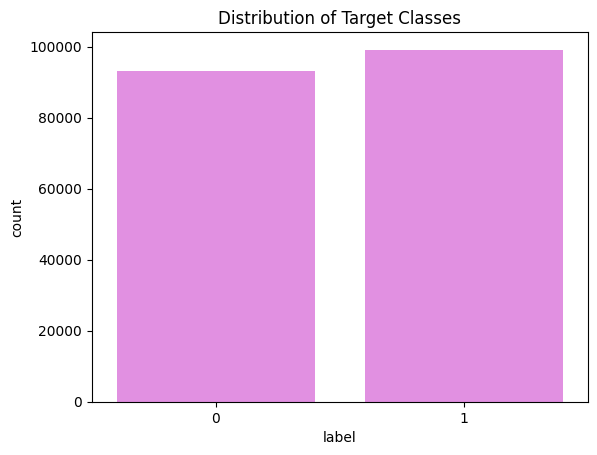

In [8]:
# Distribution of target class 'label'

sns.countplot(x='label', data=df,color="violet")
plt.title('Distribution of Target Classes')
plt.show()

class 'label' is imbalenced,so we have to apply 
SMOTE (Synthetic Minority Oversampling Technique) is typically used to handle imbalanced datasets by creating synthetic examples of the minority class.

### ↦ **`1.Data Distribution for Individual Features`**
##### **A quick look at the distributions of individual features can reveal skewness, outliers, and other patterns.**

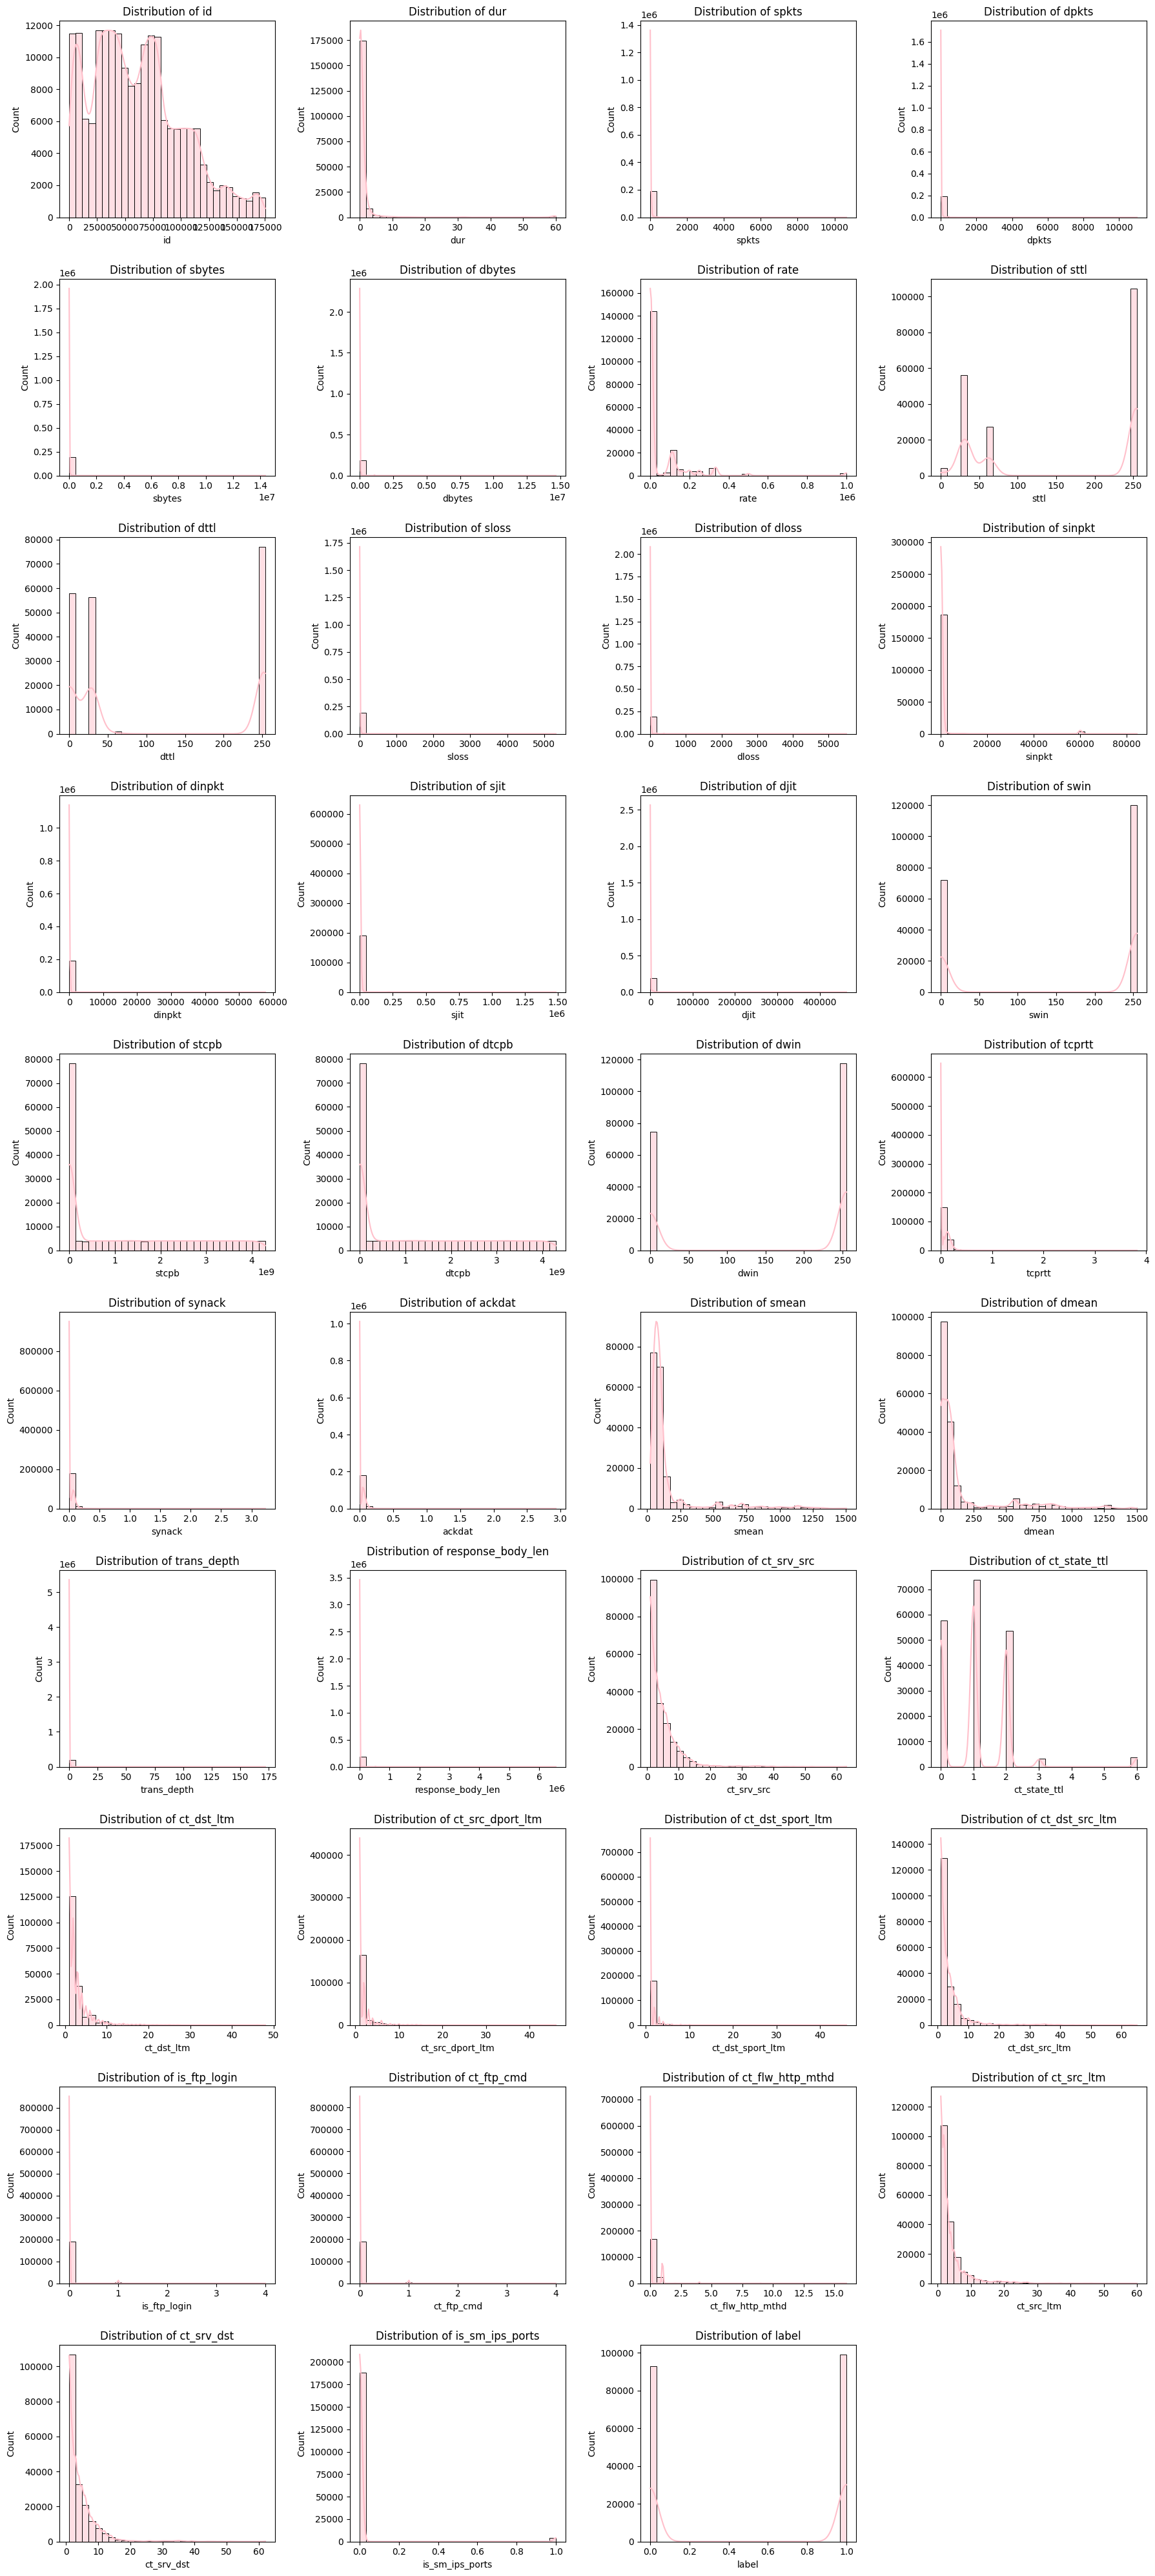

In [9]:

numeric_features=df.select_dtypes(include=['float64', 'int64']).columns
numeric_features
# Number of features to plot
num_features = len(numeric_features)
# Calculate the grid layout
num_cols = 4  # Set the number of columns you want
num_rows = math.ceil(num_features / num_cols)

plt.figure(figsize=(18, num_rows * 4))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[feature], kde=True, bins=30,color='pink')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

 It appears that many of the features are highly skewed, with long tails or clustered values at one end. This skewness might indicate the need for transformations or special handling to make the dataset more suitable for machine learning models.

### **`2.Box Plots to Identify Outliers`**

##### Box plots help identify outliers by showing the spread of values for each feature.

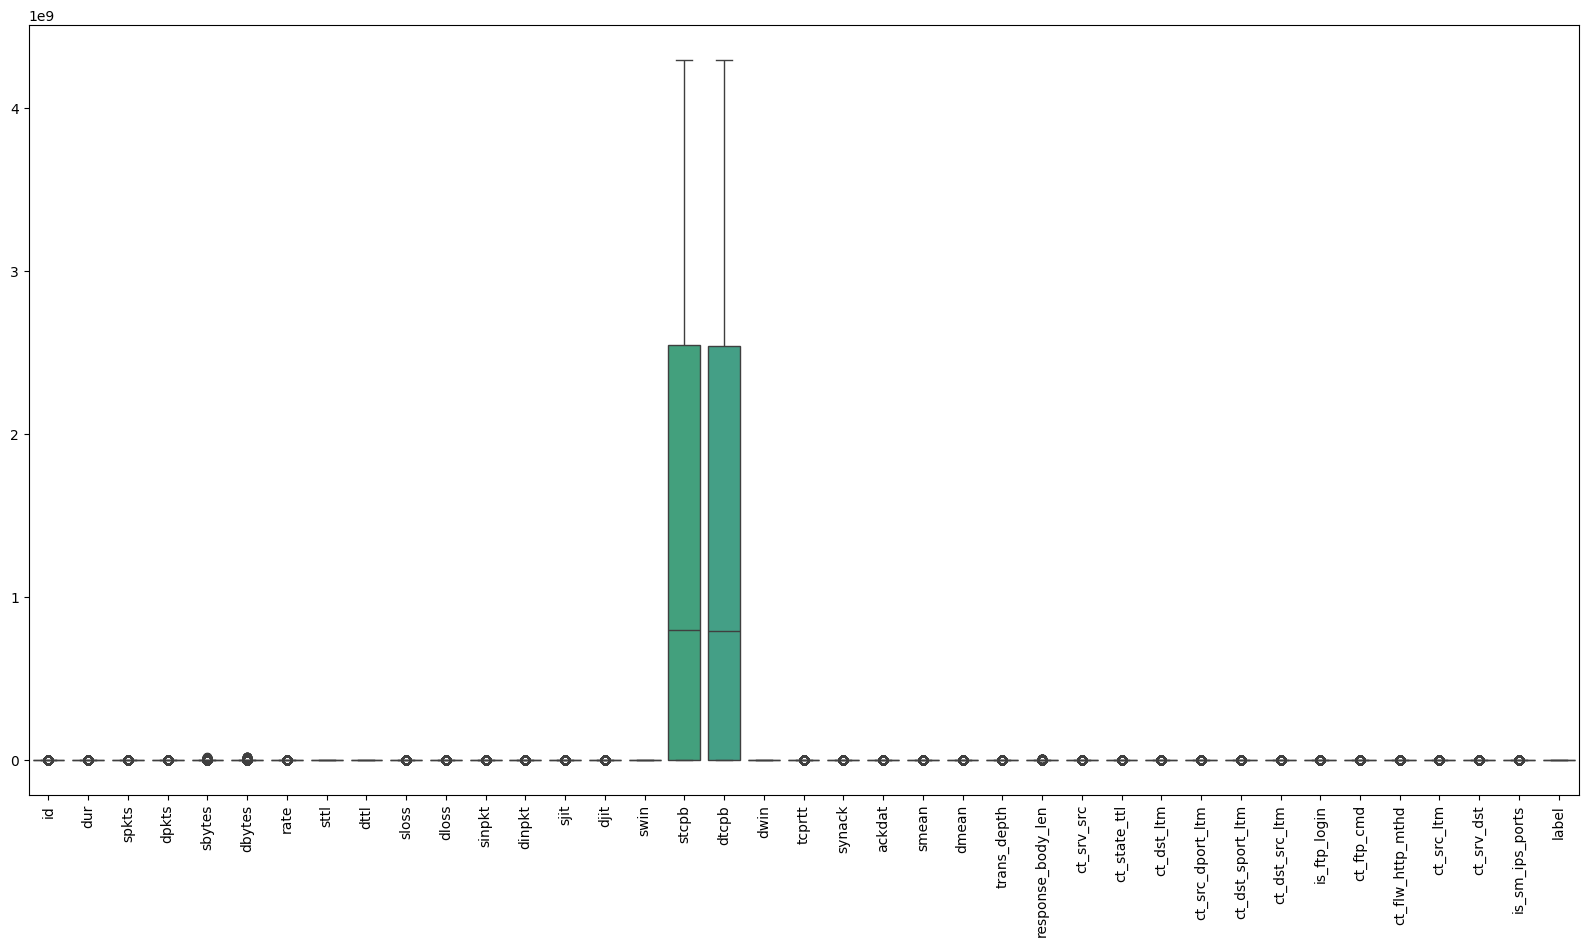

In [10]:
#checking for outliers by ploting the boxplots

plt.figure(figsize = (20,10))
sns.boxplot(data = df.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

>The boxplot that I shared highlights the significant presence of outliers in certain features, particularly with very large values for stcpb and dtcpb. Such features could disproportionately influence machine learning models, especially those sensitive to scale (e.g., linear regression, SVM, or KNN).


### **`3. Scatter Plot Matrix for Pairwise Relationships`**

##### A scatter plot matrix provides a comprehensive view of pairwise relationships across multiple features. For larger datasets, and want to select only a few key features.

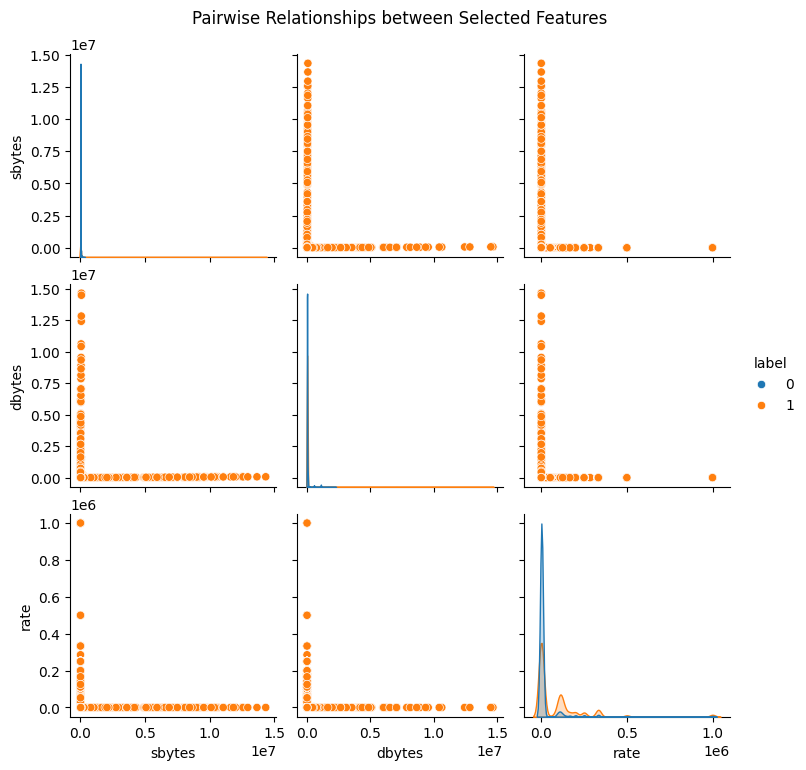

In [11]:
# Pairplot for selected features to view pairwise relationships
sns.pairplot(df[['sbytes', 'dbytes', 'rate', 'label']], hue='label', diag_kind='kde')
plt.suptitle('Pairwise Relationships between Selected Features', y=1.02)
plt.show()


>``This plot highlights pairwise relationships among the selected features (sbytes, dbytes, and rate), along with class labels (0 and 1) in different colors.``

>`⚫Observations:`

>>`Skewed Distributions:`

>>>Most of the data points are concentrated near zero for all three features.
A significant cluster appears in the lower-left quadrant, showing many small values.
This indicates high skewness and possible presence of outliers.
Separation of Classes:

>>>Class 1 (orange) tends to have larger values for sbytes and dbytes, particularly further from the origin.
For rate, while both classes peak near zero, class 1 also exhibits sporadic higher values.
Potential Correlations:

>>>The vertical and horizontal alignments suggest limited variation in one variable while the other increases.
Features like sbytes and dbytes might be correlated, but this needs further statistical validation (e.g., Pearson/Spearman correlation).`


### **`5. Violin Plot Grouped by Target Label`**
##### Visualize a feature’s distribution varies with the target class using violin plots.

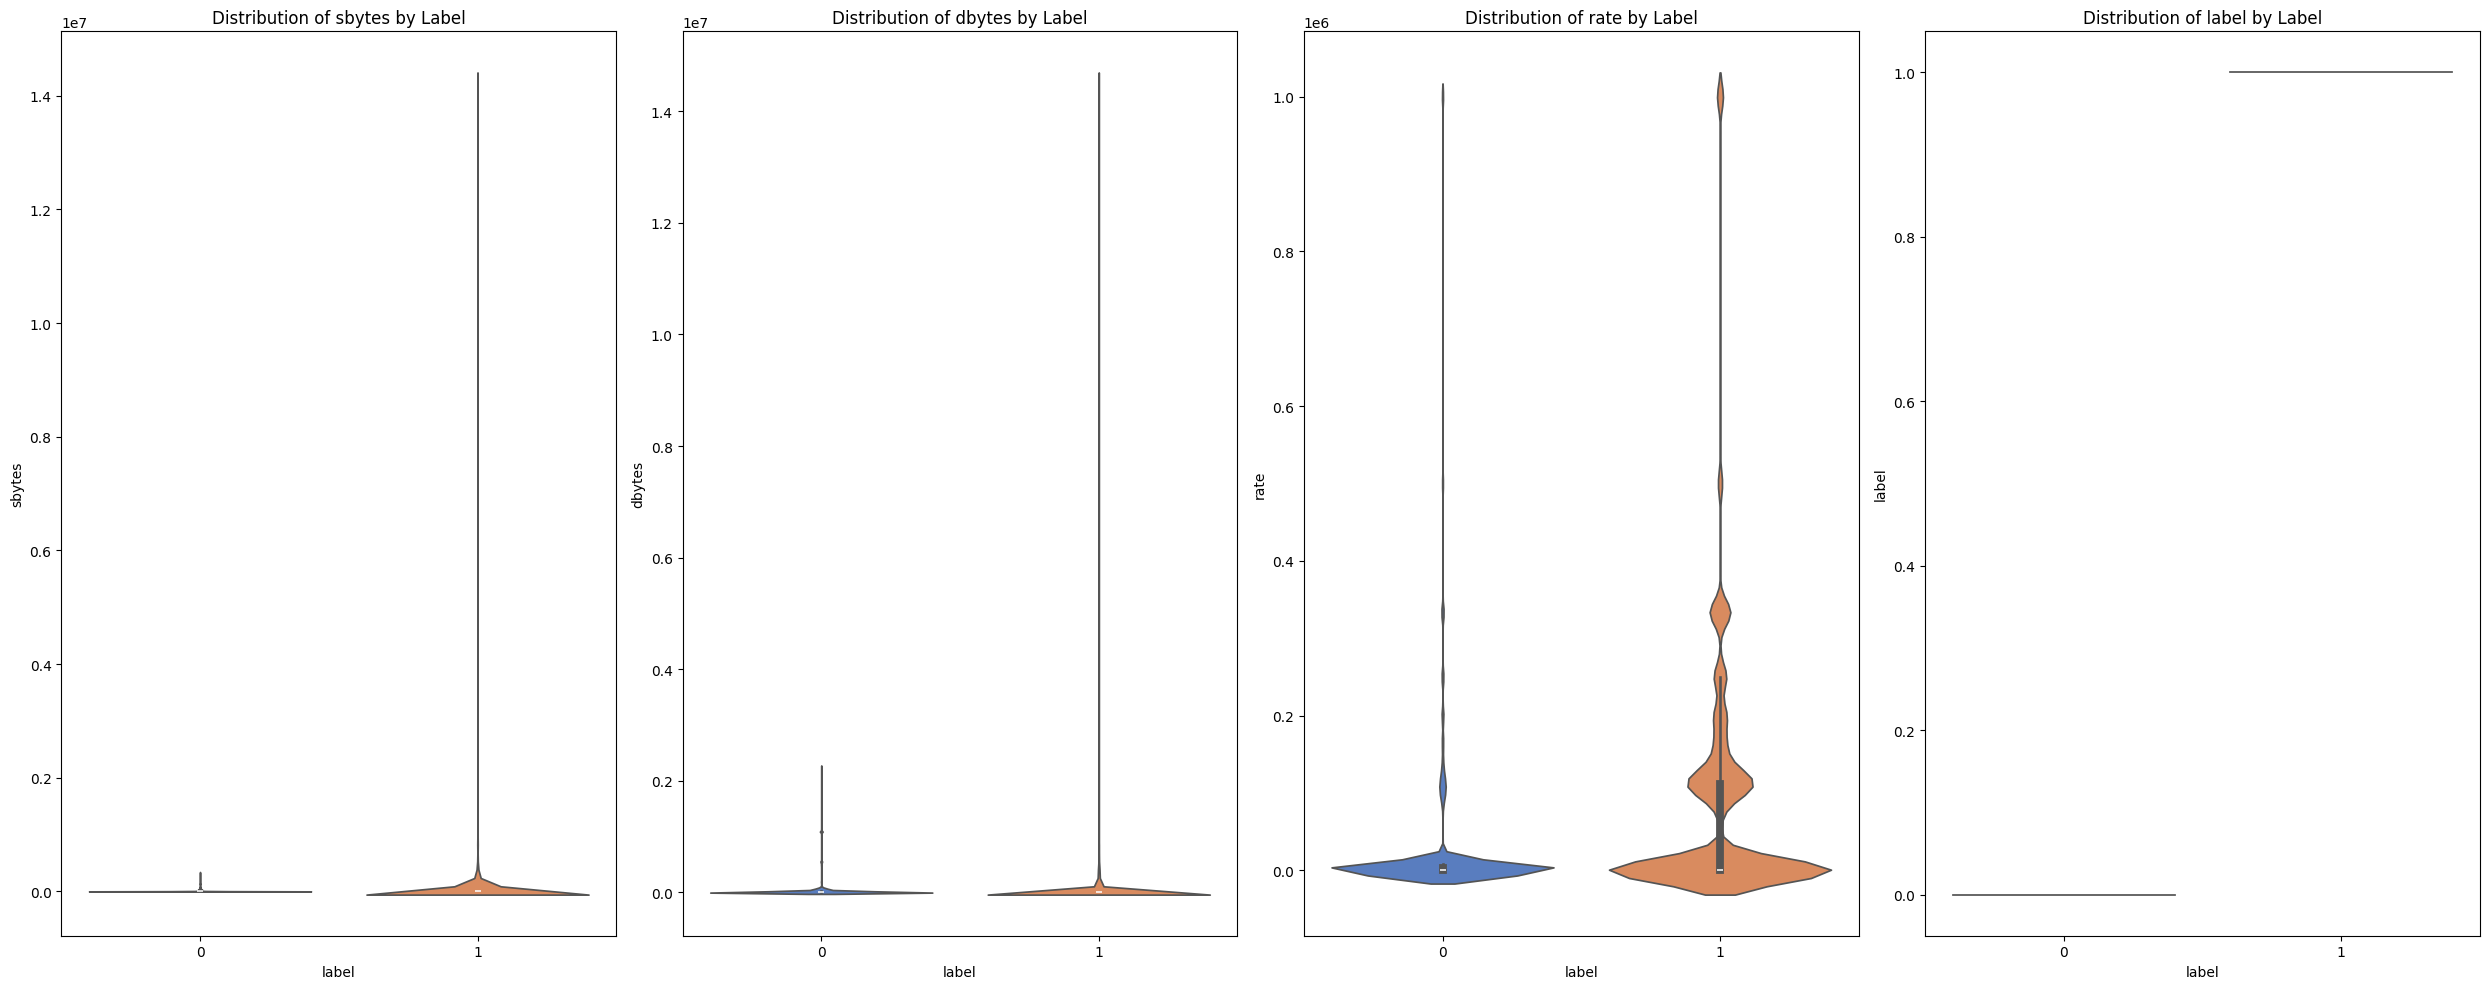

In [12]:
# Set up the plotting area
plt.figure(figsize=(25, 10))
features=['sbytes', 'dbytes', 'rate', 'label']
# Loop through each feature and create a violin plot
for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)  # Adjust to (nrows, ncols) if needed
    sns.violinplot(x='label', y=feature, data=df, hue='label', palette='muted', dodge=False, legend=False)
    plt.title(f'Distribution of {feature} by Label')

plt.tight_layout()
plt.show()

The **violin plots** above show the distributions of three features (``sbytes, dbytes,`` and ``rate``) split by **label (0 and 1)**.


**1. Distribution of ``sbytes`` by Label**

**-** For label 0 (non-anomalous class):


>>The ``sbytes`` distribution is tightly concentrated near zero.

>>There are very few instances with high ``sbytes.``

***-*** For **label 1** (anomalous class):

>>The distribution of ``sbytes`` is much more spread out, with a **long tail** extending to very high values (~1.5e7).

>>This suggests that anomalies are associated with significantly larger ``sbytes`` values.

**Insight:** ``sbytes`` can serve as a good indicator for separating the anomalous class due to its distinct distribution.

**2. Distribution of dbytes by Label**

**-**For **label 0:**

>>dbytes is concentrated near zero, similar to `sbytes`.

>>A few rare outliers show moderate values but not extreme.

**-** For **label 1:**

>>``dbytes`` also exhibits a long tail, with values extending up to ~1.5e7.

>>The spread and variability are much higher compared to **label 0.**

**Insight:** High values of dbytes appear to correlate with anomalies, similar to sbytes. Combined, these features could enhance anomaly detection.

**3. Distribution of rate by Label**

**-** For **label 0:**

>>rate is mostly concentrated near zero, but some vertical spikes suggest isolated higher values.

>>The distribution is narrow and less variable.

**-** For **label 1**:

>>The rate feature shows greater spread and multiple peaks.

>>A large number of anomalies exhibit higher rate values compared to label 0.

>>The long tail again signifies anomalies with exceptionally high rate values.

**Insight:** Anomalous records are associated with both higher rate and greater variability in its distribution.

**4. Distribution of Label**
>>The final panel simply validates that the two classes (label 0 and label 1) are represented in the dataset.

**Key Takeaways**
>>1.**sbytes** and dbytes have distinct distributions for anomalies (label 1), characterized by high values and long tails.

>>2.**rate** shows higher variability and spread for anomalies.

>>Features like **sbytes** and **dbytes** could be useful for detecting anomalies based on their statistical behavior.


## **`5.Data Preprocessing:`**
   

### **`1.Handling Outliers`**

In [13]:
def count_outliers_iqr(DF):
    outlier_count = 0  # Initialize counter for total outliers

    for col in DF.columns:
            Q1 = np.percentile(df[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers
            outliers = DF[(df[col] < lower_bound) | (DF[col] > upper_bound)]
            num_outliers = outliers.shape[0]
            outlier_count += num_outliers
            
            print(f"Feature: {col} | Outliers: {num_outliers}")
    
    return outlier_count

# Exclude the target column 'Class' while checking for outliers
total_outliers = count_outliers_iqr(df)

print(f"\nTotal number of outliers in the dataset: {total_outliers}")

Feature: id | Outliers: 1976
Feature: dur | Outliers: 15304
Feature: spkts | Outliers: 28249
Feature: dpkts | Outliers: 19576
Feature: sbytes | Outliers: 21903
Feature: dbytes | Outliers: 31130
Feature: rate | Outliers: 28839
Feature: sttl | Outliers: 0
Feature: dttl | Outliers: 0
Feature: sloss | Outliers: 14577
Feature: dloss | Outliers: 23234
Feature: sinpkt | Outliers: 14374
Feature: dinpkt | Outliers: 9120
Feature: sjit | Outliers: 10984
Feature: djit | Outliers: 23961
Feature: swin | Outliers: 0
Feature: stcpb | Outliers: 0
Feature: dtcpb | Outliers: 0
Feature: dwin | Outliers: 0
Feature: tcprtt | Outliers: 2683
Feature: synack | Outliers: 4029
Feature: ackdat | Outliers: 3969
Feature: smean | Outliers: 27126
Feature: dmean | Outliers: 30157
Feature: trans_depth | Outliers: 24208
Feature: response_body_len | Outliers: 15936
Feature: ct_srv_src | Outliers: 10668
Feature: ct_state_ttl | Outliers: 3654
Feature: ct_dst_ltm | Outliers: 13730
Feature: ct_src_dport_ltm | Outliers: 15268

The summary highlights the total number of outliers per feature in the dataset, amounting to **500,958** outliers in total. Here are insights and potential next steps:


**Key Takeaways**

**.** Features with large outlier counts may dominate the dataset and skew the analysis or machine learning models.

**.** Features with zero outliers can be analyzed separately as baseline indicators.

**.** The total count of 500,958 outliers indicates the need for careful outlier treatment, especially given the dataset size reduction earlier.




In [14]:
#capping outliers
def cap_outliers_iqr(df):
    df_capped = df.copy()  # Create a copy of the dataframe
    
    for col in df.columns:
            Q1 = np.percentile(df[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Cap values below the lower bound to the lower bound
            df_capped[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            
            # Cap values above the upper bound to the upper bound
            df_capped[col] = np.where(df[col] > upper_bound, upper_bound, df_capped[col])
    
    return df_capped


capped_df = cap_outliers_iqr(df)

# Now 'capped_data' contains the data with outliers capped.

### **`2.Addressing skewness`**

In [15]:

# Assuming 'Data' is your dataframe and 'numerical_cols' is your list of numerical columns
def log_transform(data, columns):
    for col in columns:
        if data[col].skew() > 1 or data[col].skew() < -1:
            data[col] = np.log1p(data[col])
    return data

numerical_cols = capped_df.select_dtypes(include=['float64', 'int64']).columns
skew_capped_df = log_transform(df, numerical_cols)
skew_capped_df

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sloss,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000011,1.098612,0.000000,6.208590,0.000000,11.417626,254,0,0.000000,...,0.693147,0.693147,1.098612,0.0,0.0,0.0,0.693147,1.098612,0.0,0
1,2,0.000008,1.098612,0.000000,7.474772,0.000000,11.736077,254,0,0.000000,...,0.693147,0.693147,1.098612,0.0,0.0,0.0,0.693147,1.098612,0.0,0
2,3,0.000005,1.098612,0.000000,6.974479,0.000000,12.206078,254,0,0.000000,...,0.693147,0.693147,1.386294,0.0,0.0,0.0,0.693147,1.386294,0.0,0
3,4,0.000006,1.098612,0.000000,6.803505,0.000000,12.023757,254,0,0.000000,...,1.098612,0.693147,1.386294,0.0,0.0,0.0,1.098612,1.386294,0.0,0
4,5,0.000010,1.098612,0.000000,7.662468,0.000000,11.512935,254,0,0.000000,...,1.098612,0.693147,1.386294,0.0,0.0,0.0,1.098612,1.386294,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192106,175249,1.103199,5.424950,3.931826,12.513818,8.034307,4.924048,62,252,4.709530,...,0.693147,0.693147,0.693147,0.0,0.0,0.0,2.944439,0.693147,0.0,1
192107,175268,1.069633,4.317488,3.433987,11.156222,7.665285,4.003787,62,252,3.526361,...,0.693147,0.693147,0.693147,0.0,0.0,0.0,2.944439,0.693147,0.0,1
192108,175278,1.551620,4.204693,5.831882,8.034955,12.963330,4.699544,62,252,1.945910,...,0.693147,0.693147,0.693147,0.0,0.0,0.0,1.098612,0.693147,0.0,1
192109,175300,0.691397,3.044522,3.433987,6.849066,9.722265,3.915456,62,252,2.079442,...,0.693147,0.693147,0.693147,0.0,0.0,0.0,2.079442,0.693147,0.0,1


In [16]:
skew_capped_df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sloss,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,...,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000
mean,60657.865968,0.437330,2.320937,1.849697,6.767630,5.099326,6.428703,155.902473,109.900714,1.032289,...,0.907751,0.800108,1.288160,0.011806,0.011825,0.095180,1.305767,1.452002,0.013270,0.515905
std,39718.477061,0.681772,1.148054,1.510411,1.618409,3.738853,3.851179,107.635492,116.901171,1.014134,...,0.390925,0.271808,0.626959,0.090497,0.090647,0.266658,0.615477,0.669473,0.094986,0.499748
min,1.000000,0.000000,0.693147,0.000000,3.218876,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000
25%,29876.500000,0.000010,1.098612,0.000000,5.303305,0.000000,3.262301,31.000000,0.000000,0.000000,...,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000
50%,56146.000000,0.181917,2.397895,1.945910,6.698268,5.872118,4.801806,254.000000,29.000000,1.098612,...,0.693147,0.693147,1.098612,0.000000,0.000000,0.000000,1.098612,1.386294,0.000000,1.000000
75%,84574.500000,0.648809,2.833213,2.944439,7.616284,7.501634,10.724490,254.000000,252.000000,1.609438,...,1.098612,0.693147,1.609438,0.000000,0.000000,0.000000,1.609438,1.945910,0.000000,1.000000
max,175306.000000,4.110874,9.273033,9.307376,16.479663,16.500465,13.815512,255.000000,254.000000,8.579229,...,3.850148,3.850148,4.189655,1.609438,1.609438,2.833213,4.110874,4.143135,0.693147,1.000000


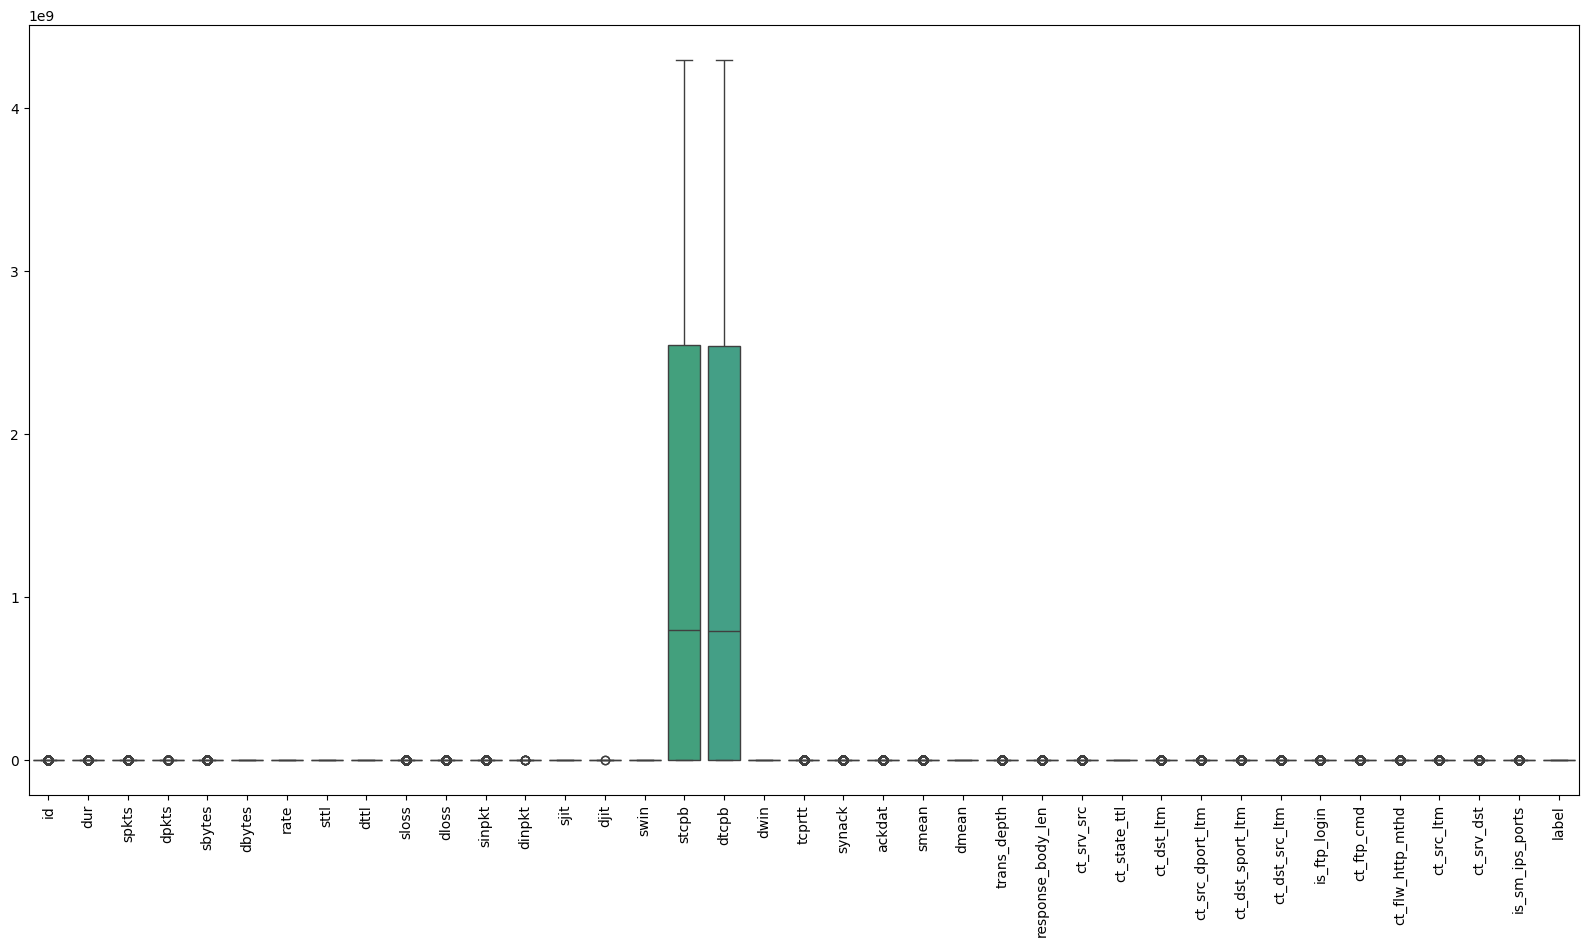

In [17]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (20,10))
sns.boxplot(data =skew_capped_df.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

In [18]:
skew_capped_df=skew_capped_df.drop(['stcpb', 'dtcpb','id'], axis=1)

In [19]:
skew_capped_df.shape

(192111, 36)

# **Correlation Heatmap Analysis**
This heatmap provides a clear view of the correlations among the dataset features.

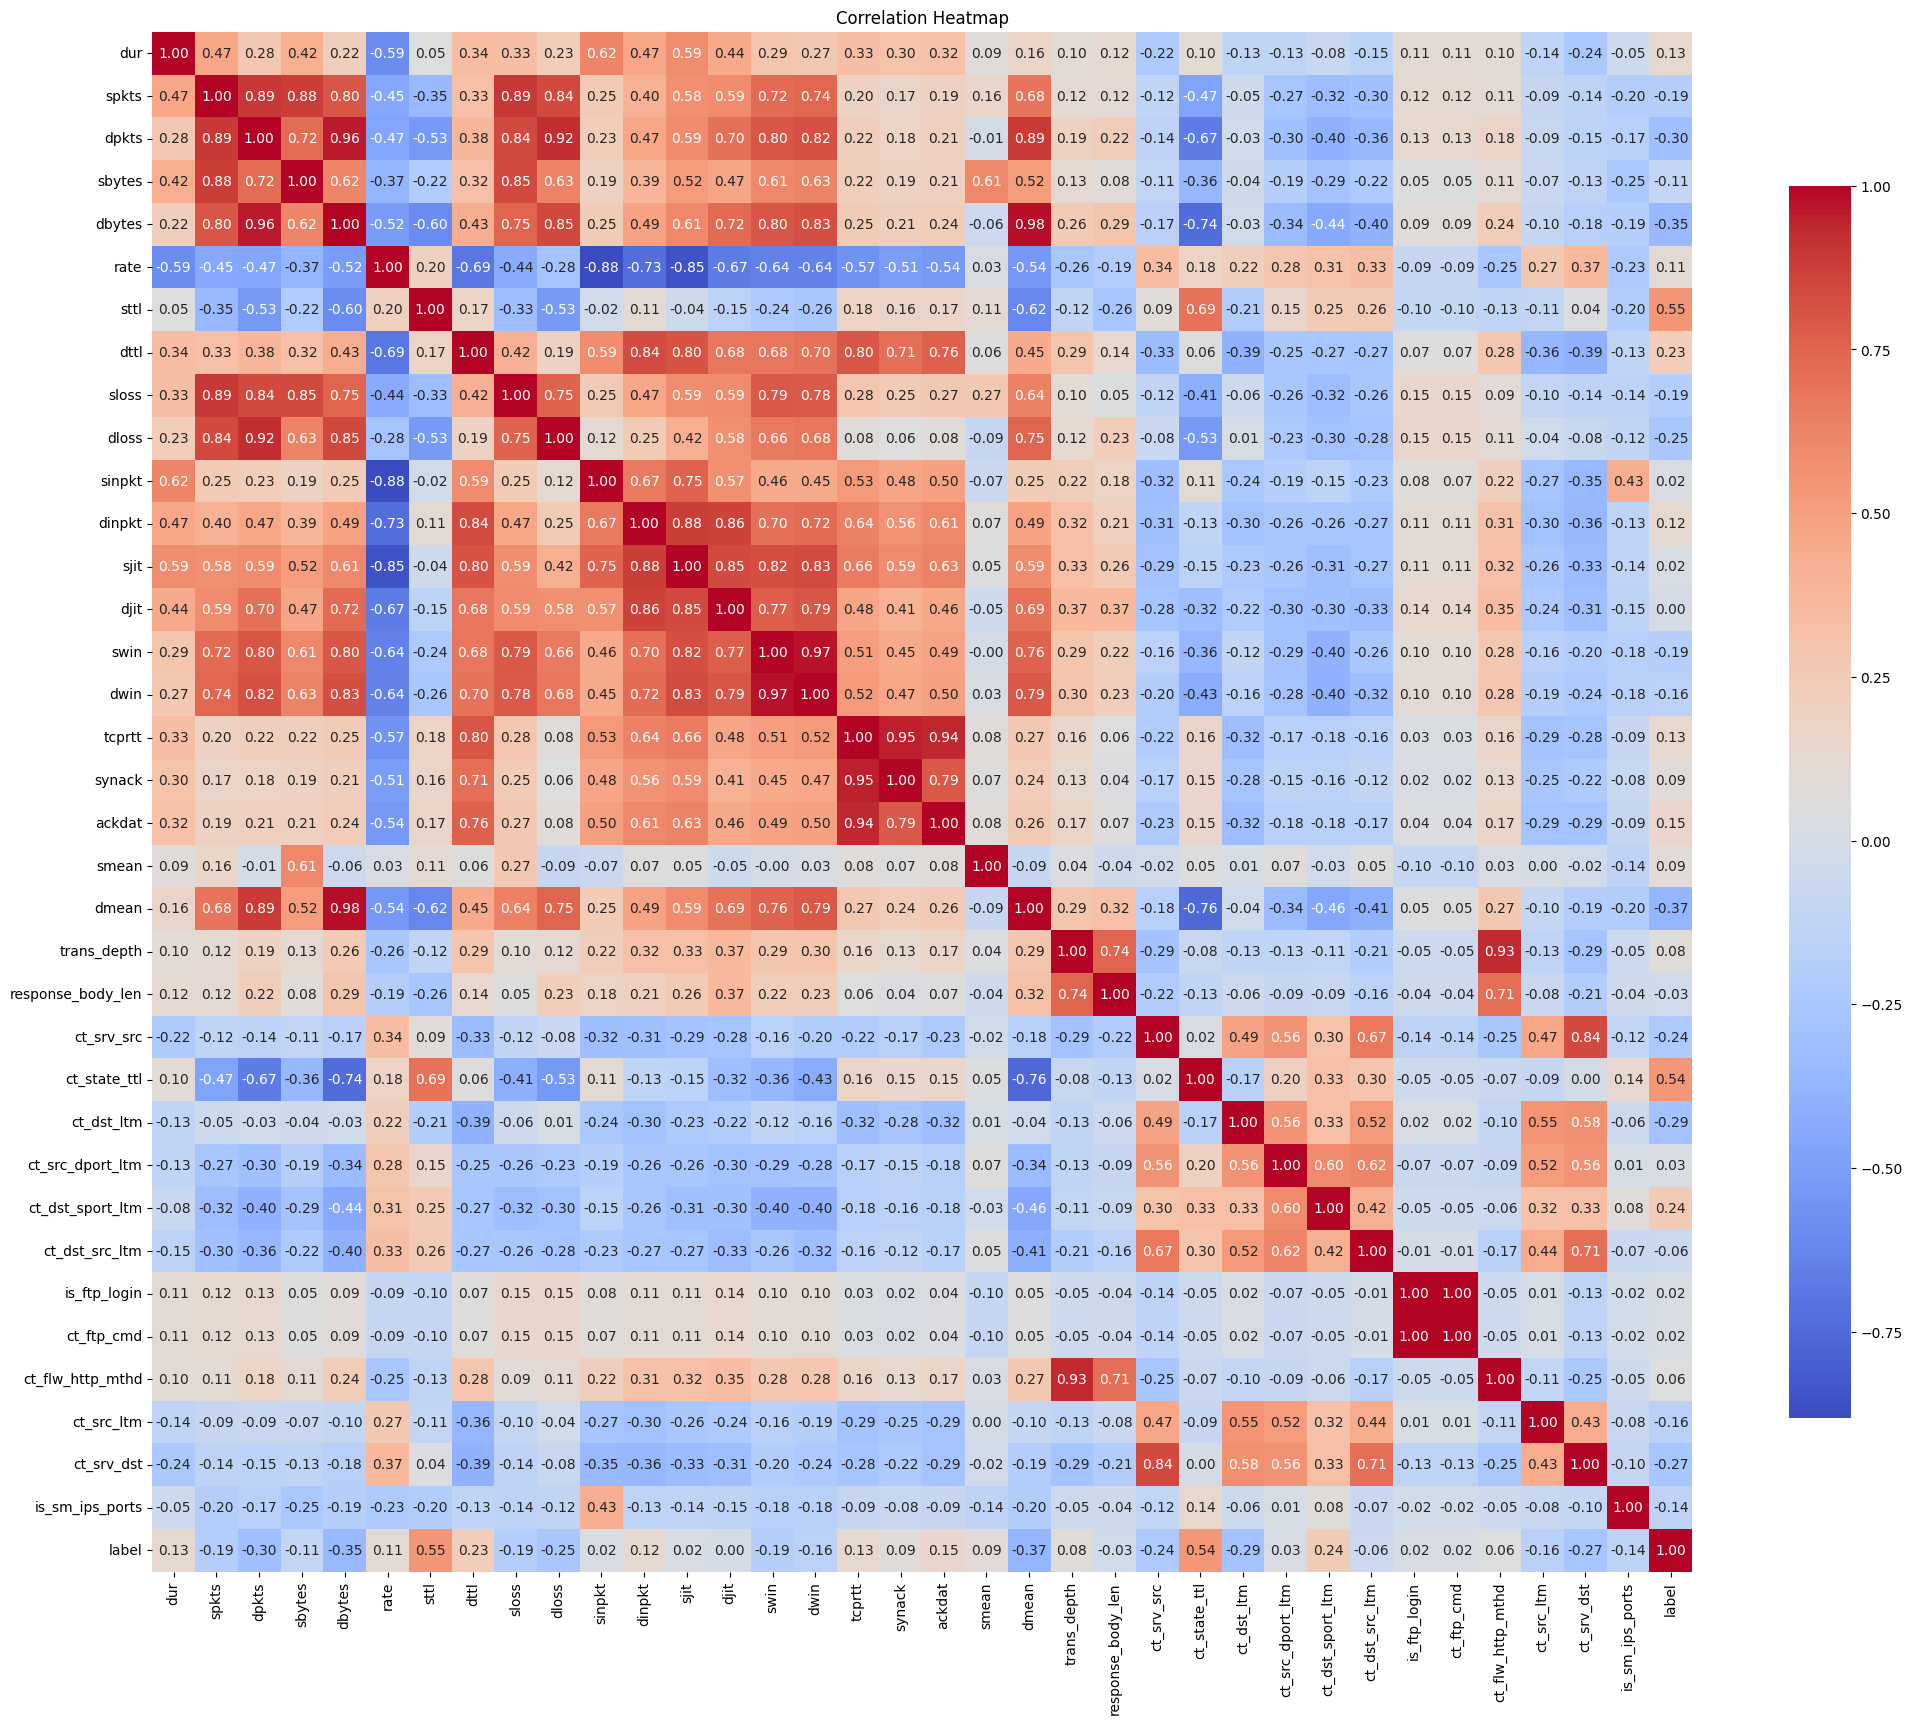

Highly Correlated Feature Pairs: [('spkts', 'dpkts'), ('spkts', 'sbytes'), ('spkts', 'sloss'), ('spkts', 'dloss'), ('dpkts', 'spkts'), ('dpkts', 'dbytes'), ('dpkts', 'sloss'), ('dpkts', 'dloss'), ('dpkts', 'dwin'), ('dpkts', 'dmean'), ('sbytes', 'spkts'), ('sbytes', 'sloss'), ('dbytes', 'dpkts'), ('dbytes', 'dloss'), ('dbytes', 'dwin'), ('dbytes', 'dmean'), ('rate', 'sinpkt'), ('rate', 'sjit'), ('dttl', 'dinpkt'), ('dttl', 'sjit'), ('sloss', 'spkts'), ('sloss', 'dpkts'), ('sloss', 'sbytes'), ('dloss', 'spkts'), ('dloss', 'dpkts'), ('dloss', 'dbytes'), ('sinpkt', 'rate'), ('dinpkt', 'dttl'), ('dinpkt', 'sjit'), ('dinpkt', 'djit'), ('sjit', 'rate'), ('sjit', 'dttl'), ('sjit', 'dinpkt'), ('sjit', 'djit'), ('sjit', 'swin'), ('sjit', 'dwin'), ('djit', 'dinpkt'), ('djit', 'sjit'), ('swin', 'sjit'), ('swin', 'dwin'), ('dwin', 'dpkts'), ('dwin', 'dbytes'), ('dwin', 'sjit'), ('dwin', 'swin'), ('tcprtt', 'synack'), ('tcprtt', 'ackdat'), ('synack', 'tcprtt'), ('ackdat', 'tcprtt'), ('dmean', 'dpkt

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = skew_capped_df.corr()

# Plot the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.show()

# Find pairs of highly correlated features (e.g., correlation > 0.8)
high_corr_pairs = [(i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns 
                   if (i != j) and (abs(correlation_matrix.loc[i, j]) > 0.8)]
print("Highly Correlated Feature Pairs:", high_corr_pairs)


*For modeling, consider removing redundant features or applying dimensionality reduction techniques like **PCA** or feature selection methods*

# **PCA Analysis**

**Benefits of PCA**

1.Reduced Dimensionality: From the original dataset with many features, PCA reduced it to 15 components.

2.Improved Model Performance: Models will be faster to train and less prone to overfitting.

3.Resolved Multicollinearity: Principal components are linear combinations of features, ensuring they are uncorrelated.


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
df_for_pca=skew_capped_df.drop('label',axis=1)
# Standardize the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_for_pca.select_dtypes(include=[np.number]))  # Only scale numerical features

# Apply PCA
# Set n_components to the desired number of principal components (e.g., 0.95 to retain 95% of variance)
pca = PCA(n_components=0.95, random_state=42)  # Keeps 95% of variance
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_data, columns=[f"PC{i+1}" for i in range(pca_data.shape[1])])

# Display the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("\nTotal number of components selected:", pca_data.shape[1])

# Optionally, combine PCA components with non-numeric columns if needed
non_numeric_data = skew_capped_df.select_dtypes(exclude=[np.number]).reset_index(drop=True)
final_df = pd.concat([pca_df, non_numeric_data], axis=1)

# Display final DataFrame with PCA components
print("Final DataFrame after PCA:")
print(final_df.head())

Explained variance by each component: [0.35809985 0.13905092 0.09236774 0.07130578 0.05943261 0.04942045
 0.04510394 0.02902618 0.02245963 0.02191838 0.01984531 0.01504824
 0.01173288 0.01019368 0.0083796 ]

Total number of components selected: 15
Final DataFrame after PCA:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.879599  1.450700 -2.002094 -1.019664 -1.253427  1.483216  0.180661   
1 -3.724048  1.319120 -1.745546 -1.175753 -1.906404  2.393644  0.905037   
2 -3.986490  1.177655 -1.389679 -1.001092 -1.650185  1.989886  0.492923   
3 -4.260621  0.830455 -0.729339 -0.595398 -1.238613  1.814930  0.556949   
4 -4.113278  0.765265 -0.545634 -0.697572 -1.655210  2.388038  1.089665   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.126878  0.337902 -0.382884  0.129953 -0.230149 -0.022271  0.406344   
1  0.938576  0.243913 -0.769041 -0.050263 -0.480182 -0.317300  0.645151   
2  0.541911  0.569801 -0.885467  0.214268 -0.4766

>Here we  can see the **15 Principal Components** were selected, reducing the dimensionality of the dataset while retaining most of the variance.

>The dimensionality reduction process likely helps mitigate multicollinearity issues observed earlier.

The new dataset consists of 15 Principal Components (PC1 to PC15).

In [23]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-3.879599,1.450700,-2.002094,-1.019664,-1.253427,1.483216,0.180661,0.126878,0.337902,-0.382884,0.129953,-0.230149,-0.022271,0.406344,0.085490
1,-3.724048,1.319120,-1.745546,-1.175753,-1.906404,2.393644,0.905037,0.938576,0.243913,-0.769041,-0.050263,-0.480182,-0.317300,0.645151,-0.025105
2,-3.986490,1.177655,-1.389679,-1.001092,-1.650185,1.989886,0.492923,0.541911,0.569801,-0.885467,0.214268,-0.476611,-0.350564,0.508902,-0.108409
3,-4.260621,0.830455,-0.729339,-0.595398,-1.238613,1.814930,0.556949,0.712585,0.080333,-0.598397,-0.005564,-0.128398,-0.005139,0.692319,0.511367
4,-4.113278,0.765265,-0.545634,-0.697572,-1.655210,2.388038,1.089665,1.272726,-0.010221,-0.892869,-0.123846,-0.305267,-0.203431,0.825842,0.445394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192106,4.393003,-2.179507,0.723309,-1.908254,-2.052279,2.641254,3.185469,1.460062,-0.624065,0.856830,-0.932974,2.486364,-1.010642,0.213275,-0.487982
192107,3.882408,-1.509346,0.459880,-1.460634,-1.455490,1.886660,2.774143,1.096898,-1.142602,0.402592,-1.048104,2.336913,-1.155333,0.467671,-0.476998
192108,5.150673,-1.738330,-0.916658,-1.289631,-0.030432,-0.832337,0.574863,-1.752781,0.378634,2.077597,0.395462,0.374020,-0.043051,0.782275,0.678267
192109,3.552523,-0.709650,-0.799354,-0.697016,0.308028,-1.023482,-0.031378,-1.051956,-0.769890,0.948907,-0.868601,1.530607,-0.447357,0.687647,0.013683


In [25]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming final_df is your DataFrame after PCA
final_df = pd.concat([final_df, skew_capped_df['label']], axis=1)
# Separate features and labels
X = final_df.drop(['label'], axis=1)
y = final_df['label']

# Fit a Random Forest model to identify important features
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
important_features = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Feature importances from Random Forest:")
print(important_features)

# Select top features
top_features = important_features.head(20).index  # Adjust number of top features as necessary
X_selected = X[top_features]

# Now you can proceed with your model building using the selected features


Feature importances from Random Forest:
PC2     0.246899
PC6     0.124518
PC1     0.097875
PC8     0.067786
PC14    0.057296
PC7     0.050486
PC9     0.045976
PC4     0.045818
PC15    0.044950
PC10    0.044042
PC11    0.043962
PC3     0.043814
PC5     0.038816
PC13    0.024017
PC12    0.023747
dtype: float64


In [26]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_selected, y)

print(f"Balanced dataset shape: {X_smote.shape}, {y_smote.shape}")


Balanced dataset shape: (198222, 15), (198222,)


##### The dataset is now balanced, with:`

Shape of Features: (198,222, 15)
Shape of Target: (198,222,)

# Standardizing the dataset

Here, applying StandardScaler to your balanced dataset X_smote

---Many machine learning algorithms (e.g., SVMs, KNN, PCA) are sensitive to the scale of the features.

---Scaling makes gradient-based optimizers (like those in neural networks) converge faster.

---Helps with the PCA-transformed data (which you already computed) as PCA relies on variance calculations.

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)


 # Split the scaled data into training and test sets using the train_test_split function.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_smote, test_size=0.2, random_state=42)

# Building the ML Model

In [29]:
# Define each model with parameters to reduce overfitting
models = {
    'Logistic Regression': LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100, class_weight='balanced'),
    'SVM': SVC(C=1.0, kernel='rbf', gamma='scale', probability=True, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(
        criterion='gini', 
        splitter='best', 
        max_depth=10,  # Limit depth to prevent overfitting
        min_samples_split=10,  # Minimum samples required to split
        min_samples_leaf=5,  # Minimum samples required for a leaf
        max_features='sqrt',  # Number of features to consider for the best split
        random_state=42, 
        class_weight='balanced'
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        criterion='gini',
        max_depth=10,  # Limit depth to prevent overfitting
        min_samples_split=10,  # Minimum samples required to split
        min_samples_leaf=5,  # Minimum samples required for a leaf
        max_features='sqrt',  # Number of features to consider for the best split
        bootstrap=True,
        oob_score=True,
        random_state=42,
        class_weight='balanced'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100, 
        learning_rate=0.1, 
        max_depth=3, 
        min_samples_split=2, 
        min_samples_leaf=1, 
        subsample=1.0, 
        max_features=None, 
        random_state=42
    ),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME', n_estimators=100, learning_rate=1)
}

# Fit each model and display training and testing scores
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f"{name} Performance on Training Data:")
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
    print(f"Precision: {precision_score(y_train, y_train_pred)}")
    print(f"Recall: {recall_score(y_train, y_train_pred)}")
    print(f"F1-Score: {f1_score(y_train, y_train_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y_train, y_train_pred)}")
    print(confusion_matrix(y_train, y_train_pred))
    print("\n")
    
    print(f"{name} Performance on Test Data:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
    print(f"Precision: {precision_score(y_test, y_test_pred)}")
    print(f"Recall: {recall_score(y_test, y_test_pred)}")
    print(f"F1-Score: {f1_score(y_test, y_test_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")
    print(confusion_matrix(y_test, y_test_pred))
    print("\n")


Logistic Regression Performance on Training Data:
Accuracy: 0.8511637879389823
Precision: 0.8235779827183178
Recall: 0.8936011810874586
F1-Score: 0.8571618775569488
ROC-AUC: 0.8511849189019383
[[64158 15170]
 [ 8432 70817]]


Logistic Regression Performance on Test Data:
Accuracy: 0.849716231555051
Precision: 0.8221202854230377
Recall: 0.8933138656731447
F1-Score: 0.8562397451983399
ROC-AUC: 0.8496291817371436
[[15944  3839]
 [ 2119 17743]]


SVM Performance on Training Data:
Accuracy: 0.9150318141975192
Precision: 0.9176986092589065
Recall: 0.911746520460826
F1-Score: 0.9147128823171967
ROC-AUC: 0.915030178342555
[[72848  6480]
 [ 6994 72255]]


SVM Performance on Test Data:
Accuracy: 0.9106570815991928
Precision: 0.9122461351924825
Recall: 0.9091229483435707
F1-Score: 0.9106818640306638
ROC-AUC: 0.9106601447475322
[[18046  1737]
 [ 1805 18057]]


Decision Tree Performance on Training Data:
Accuracy: 0.8940703885178809
Precision: 0.879461410395071
Recall: 0.9131976428724653
F1-Score: 

**SVM** consistently performs the best across both training and test datasets in terms of accuracy, precision, recall, and F1-score.


**Random** Forest follows closely, especially with excellent recall values.

**Logistic Regression** provides decent results but slightly lower performance compared to the other models, especially in precision.

**Decision Tree** and **Gradient Boosting** show similar performance, with Gradient Boosting slightly outperforming in some metrics.

**AdaBoost** delivers the lowest performance among the models in both training and test sets.

### **Hyperparameter Tuning**: 
Use GridSearchCV for fine-tuning hyperparameters.



In [30]:
# Define each model with parameters to reduce overfitting
models = {
    'Logistic Regression': LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100, class_weight='balanced'),
    'SVM': SVC(C=1.0, kernel='rbf', gamma='scale', probability=True, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(
        criterion='gini', 
        splitter='best', 
        max_depth=10,  # Limit depth to prevent overfitting
        min_samples_split=10,  # Minimum samples required to split
        min_samples_leaf=5,  # Minimum samples required for a leaf
        max_features='sqrt',  # Number of features to consider for the best split
        random_state=42, 
        class_weight='balanced'
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        criterion='gini',
        max_depth=10,  # Limit depth to prevent overfitting
        min_samples_split=10,  # Minimum samples required to split
        min_samples_leaf=5,  # Minimum samples required for a leaf
        max_features='sqrt',  # Number of features to consider for the best split
        bootstrap=True,
        oob_score=True,
        random_state=42,
        class_weight='balanced'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100, 
        learning_rate=0.1, 
        max_depth=3, 
        min_samples_split=2, 
        min_samples_leaf=1, 
        subsample=1.0, 
        max_features=None, 
        random_state=42
    ),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME', n_estimators=100, learning_rate=1)
}

# Define the parameter grid for each model
param_grid = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'SVM': {
        'C': [1],
        'kernel': ['rbf'],
        'gamma': ['scale']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    },
    'Random Forest': {
        'n_estimators': [100],
        'max_depth': [10],
        'min_samples_split': [10],
        'min_samples_leaf': [5]
    },
    'Gradient Boosting': {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [5]
    },
    'AdaBoost': {
        'n_estimators': [50],
        'learning_rate': [0.5]
    }
}

# Fit the GridSearchCV for each model
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_}")

# Evaluate the best model on test data
for name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    print(f"{name} Performance on Test Data:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
    print(f"Precision: {precision_score(y_test, y_test_pred)}")
    print(f"Recall: {recall_score(y_test, y_test_pred)}")
    print(f"F1-Score: {f1_score(y_test, y_test_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")
    print(confusion_matrix(y_test, y_test_pred))
    print("\n")


Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.851245765692832
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy for SVM: 0.9125219994485585
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy for Decision Tree: 0.8885399479978059
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.9086815943174692
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation accuracy for Gradient Boosting: 0.9079500808521601
Best parameters for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 50}
Best cross-validation accuracy for AdaBoost: 0.8497575572517141
Logistic Regression Performance on Test Data:
Accuracy

**SVM** stands out with the highest accuracy and other performance metrics, consistently delivering solid results.

**Random Forest** and **Gradient Boosting** also perform well, with Gradient Boosting showing a slight edge in precision and recall.

**Logistic Regression** remains strong, but slightly behind the other models, especially in terms of precision.

**AdaBoost** has lower accuracy, precision, and ROC-AUC, making it less favorable compared to the other models in this case.

### Data for Visualization

In [31]:

from sklearn.metrics import roc_curve, auc

# Create a DataFrame to hold the performance metrics
performance_data = []

for name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_test)
    
    performance_data.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1-Score': f1_score(y_test, y_test_pred),
        'ROC-AUC': roc_auc_score(y_test, y_test_pred_proba),
    })

performance_df = pd.DataFrame(performance_data)


### Bar Plot for Accuracy, Precision, Recall, and F1-Score

The bar plot displays the performance of six machine-learning models (Logistic Regression, SVM, Decision Tree, Random Forest, Gradient Boosting, AdaBoost) across four evaluation metrics:

<Figure size 1000x800 with 0 Axes>

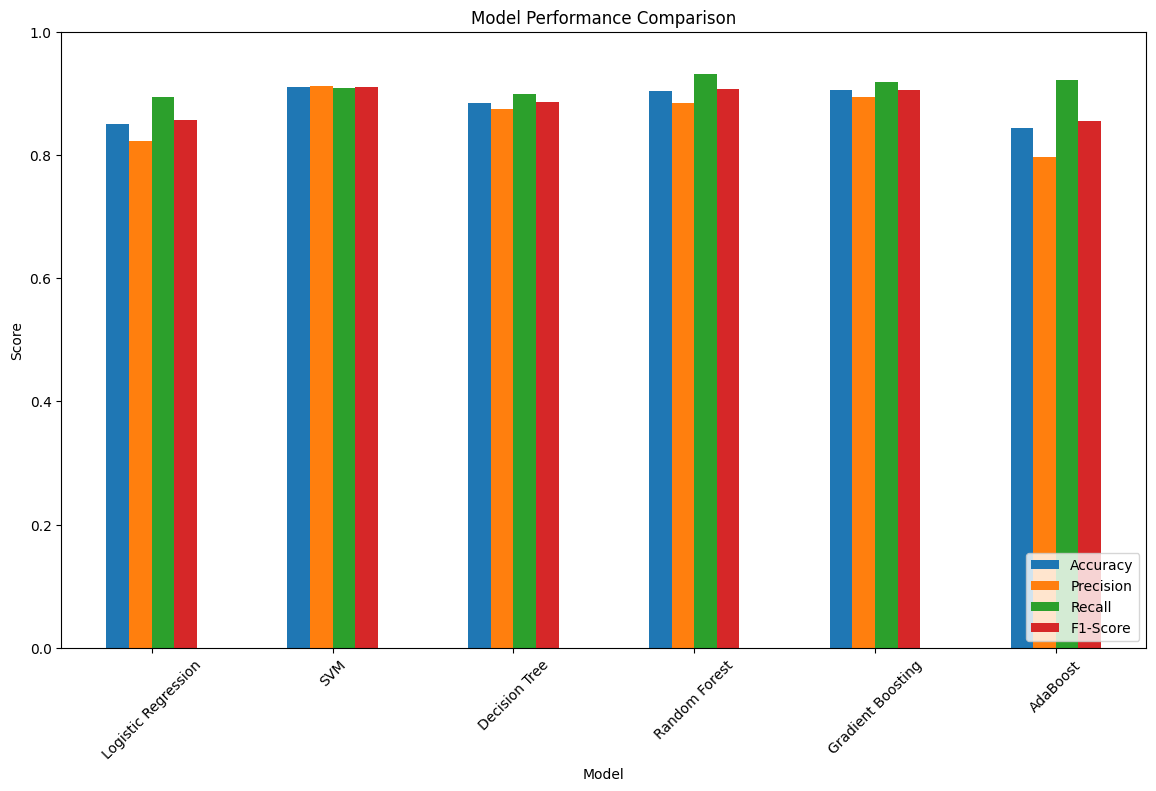

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming performance_data has been populated as shown before
performance_df = pd.DataFrame(performance_data)

# Plot accuracy, precision, recall, and F1-score
plt.figure(figsize=(10, 8))
performance_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


### ROC Curves

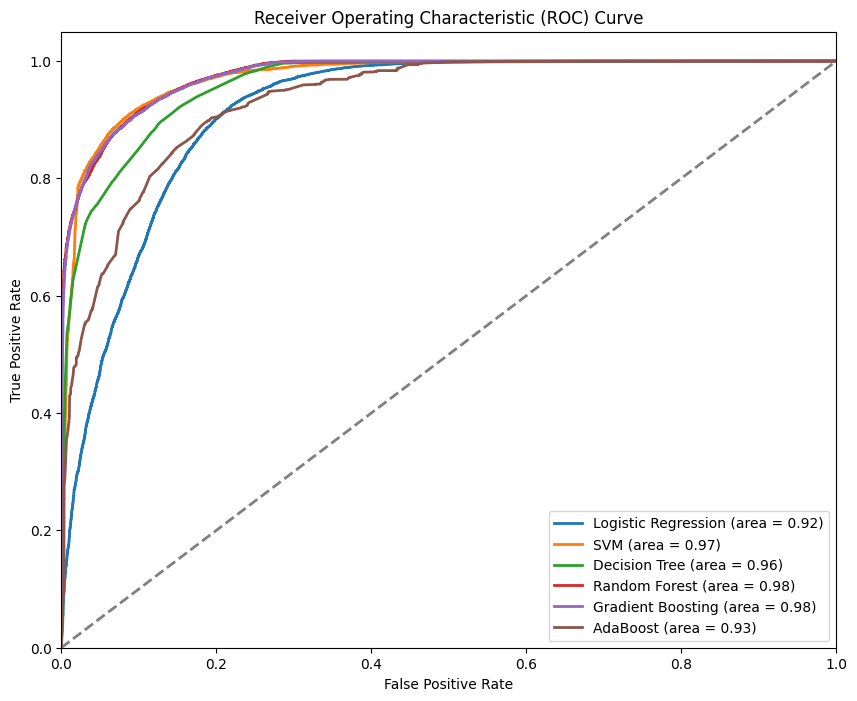

In [33]:
from sklearn.metrics import roc_curve, auc

# Plot ROC Curves
plt.figure(figsize=(10, 8))

for name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_test_pred_proba = [0] * len(y_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Step 4: Confusion Matrices

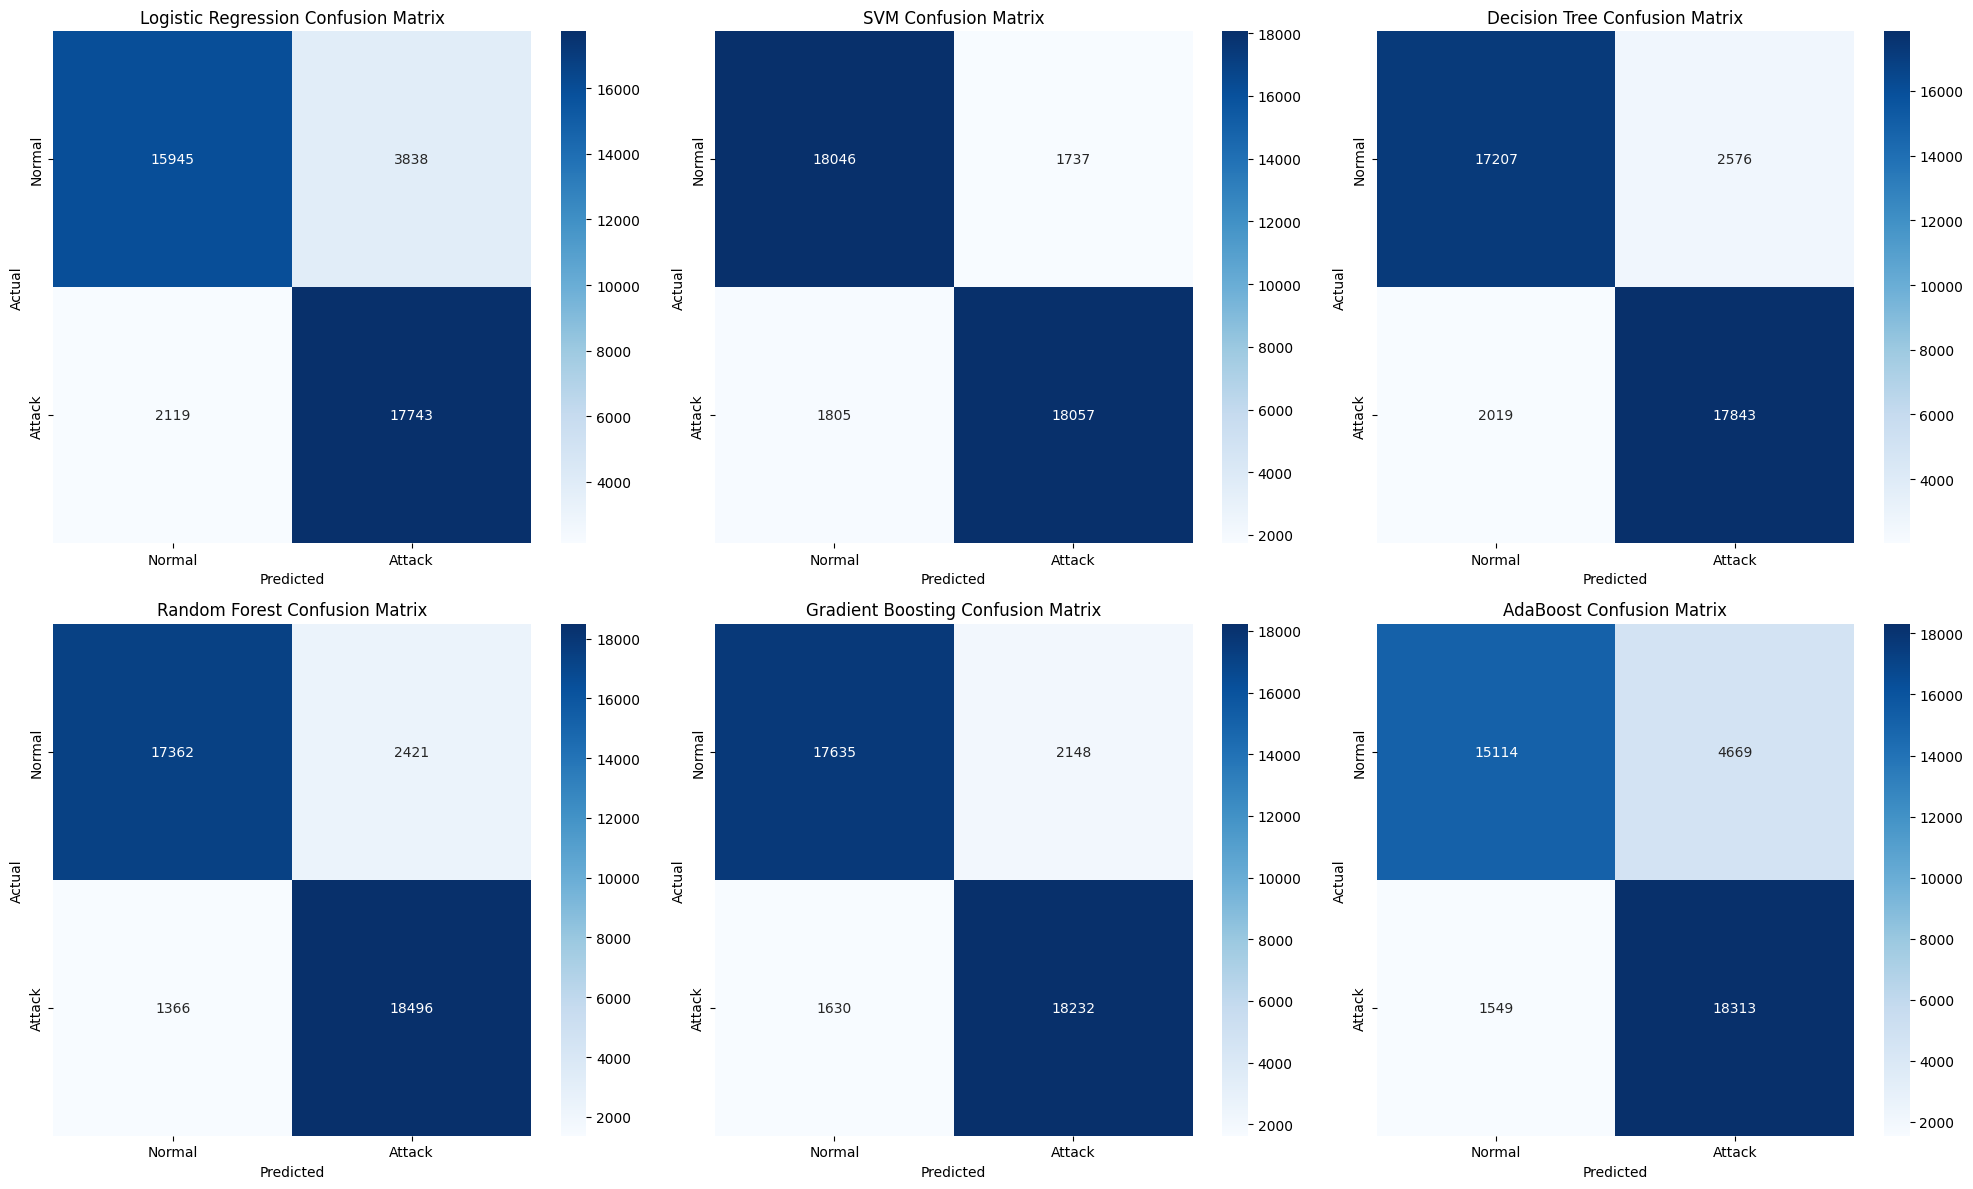

In [34]:
import seaborn as sns

# Plot Confusion Matrices
plt.figure(figsize=(20, 12))

for i, (name, model) in enumerate(best_models.items(), 1):
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [35]:
import joblib
joblib.dump(best_models, 'best_model.pkl')  # Save the trained model

['best_model.pkl']

In [39]:
import joblib

# Save the best model
best_model = best_models['SVM']  # Replace with the model you want to save
joblib.dump(best_model, 'best_model.pkl')
print("Model saved as 'best_model.pkl'")


Model saved as 'best_model.pkl'


TEST WITH UNSEEN DATA

In [40]:
# Load the saved model
loaded_model = joblib.load('best_model.pkl')

# Assume new_data is your unseen data
new_data = X_test[:5]  # Replace with actual unseen data

# Predict
predictions = loaded_model.predict(new_data)
print(predictions)


[0 0 1 1 1]


0: The instance is predicted as "normal" (non-malicious).

1: The instance is predicted as "attack" (malicious).

Insights from the Model's Predictions:
1. Prediction Outcome:
The model has predicted the first two instances as "normal" (non-malicious) and the last three instances as "attack" (malicious). This implies that according to the model, the initial instances do not show signs of malicious activity, while the later instances are flagged as potential threats.